<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "blue">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>Why did you choose this web site?</li>
<li>What is your area of interest from it?</li>
Then add screenshot from the site.(just copy and paste the image in the text-box or insert it from your computer)


 add your answers here

Причината поради која што го избрав овој сајт е тоа што имам голем интерес во спортот. Сакам да ги добивам најновите вести, кога се објавени како и податоци за истите.


add the screenshot here
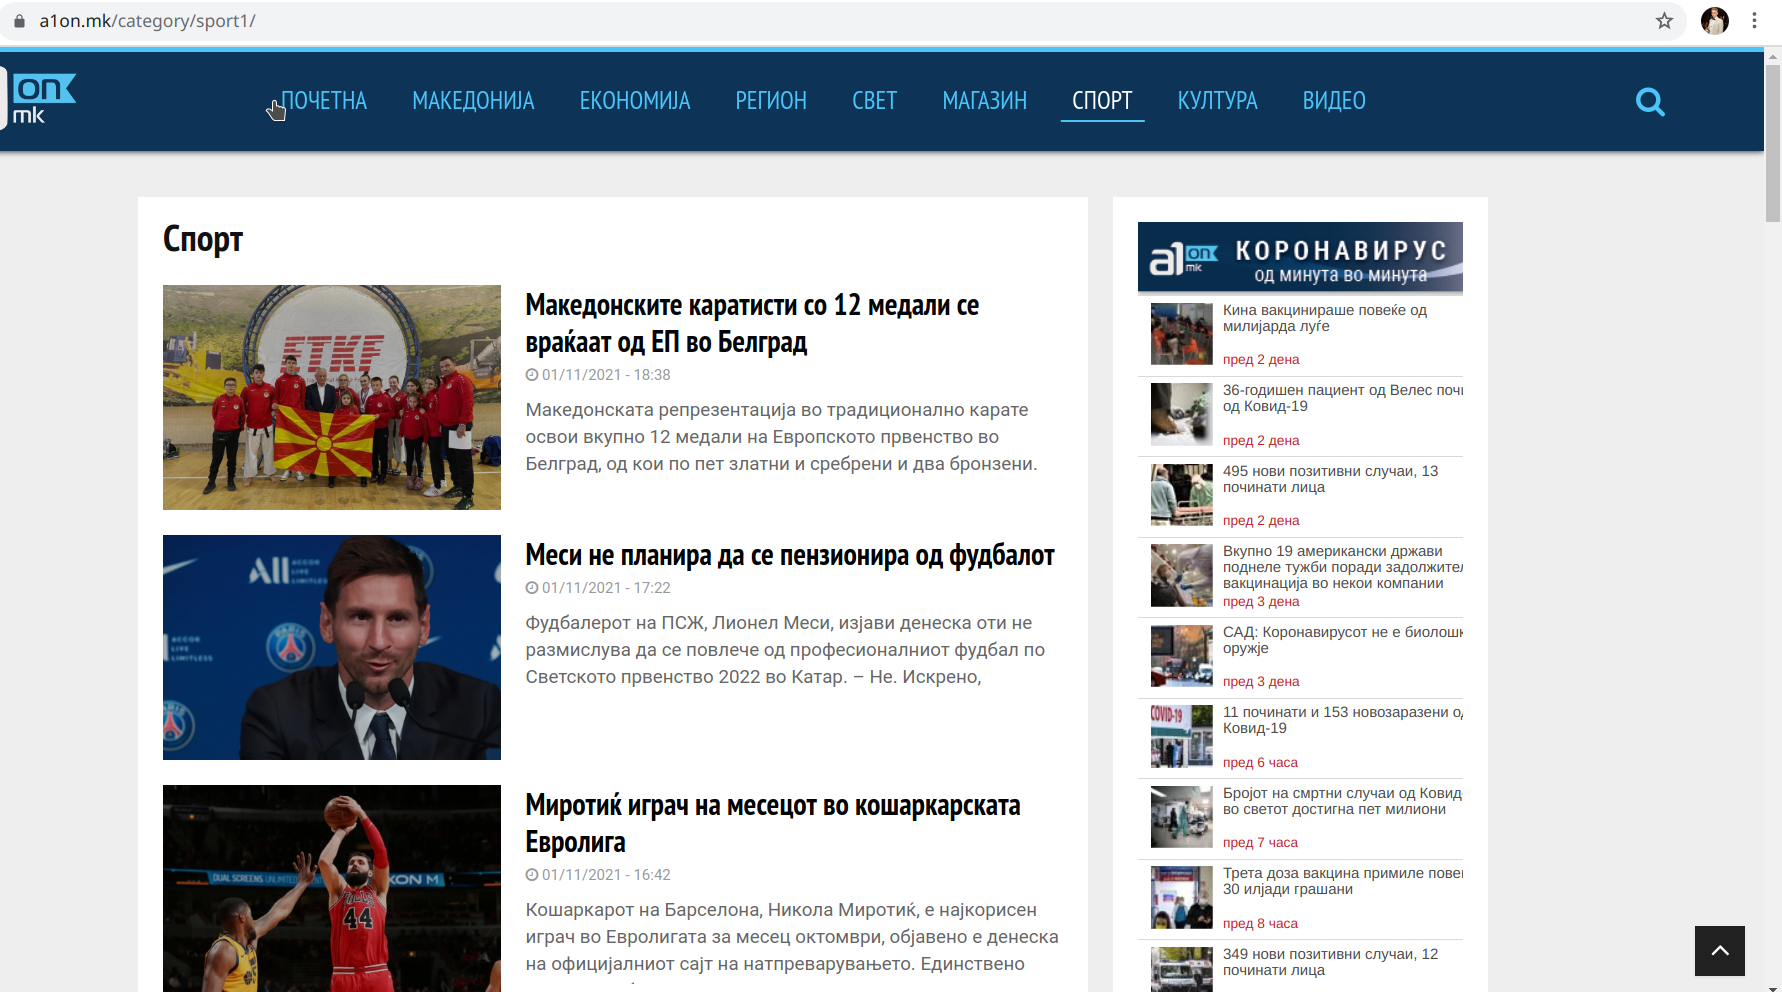

# <font color='Orange'>Requirements specified for Web Scraping</font>

Import all libraries and modules that you are going to use.

In [14]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font>

 **Fetch a website's content - send request**

In [15]:
#add your code
snapshot_url = 'https://a1on.mk/category/sport1/'

snapshot = requests.get(snapshot_url)

snapshot

<Response [200]>

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.


If your webpage is responding with 400, then try again or change it with another one having similar content.

In [16]:
#add your code
type(snapshot)

requests.models.Response

snapshot = requests.get(snapshot_url)
raw_html = snapshot.text
print(raw_html[:500])

<!DOCTYPE html>
<html lang="en-US">
<head>
	<meta charset="UTF-8">
		<meta name="viewport" content="width=device-width, initial-scale=1">
		<link rel="profile" href="https://gmpg.org/xfn/11">
	<title>Спорт</title>

<!-- This site is optimized with the Yoast SEO plugin v11.4 - https://yoast.com/wordpress/plugins/seo/ -->
<link rel="canonical" href="https://a1on.mk/category/sport1/" />
<link rel="next" href="https://a1on.mk/category/sport1/page/2/" />
<meta property="og:locale" content="en_US" />



# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [17]:
#add your code
soup = BeautifulSoup(raw_html, 'html.parser')
soup.select_one('title')

<title>Спорт</title>

**Print the HTML code that you get**

In [18]:
#add your code
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>Спорт</title>
<!-- This site is optimized with the Yoast SEO plugin v11.4 - https://yoast.com/wordpress/plugins/seo/ -->
<link href="https://a1on.mk/category/sport1/" rel="canonical">
<link href="https://a1on.mk/category/sport1/page/2/" rel="next"/>
<meta content="en_US" property="og:locale">
<meta content="object" property="og:type">
<meta content="Спорт" property="og:title"/>
<meta content="Спорт – Фудбал – Вести – Кошарка – Тенис – УЕФА – ФИФА – НБА | А1он" property="og:description"/>
<meta content="https://a1on.mk/category/sport1/" property="og:url"/>
<meta content="А1он" property="og:site_name"/>
<meta content="347045399196888" property="fb:app_id"/>
<meta content="summary" name="twitter:card"/>
<meta content="Спорт – Фудбал – Вести – Кошарка – Тенис – УЕФА – ФИФА – НБА | А1он" name="tw

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

`add your attributes here for building the dataset`

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [19]:
#add your code
post_title=soup.select(".entry-title")
print(len(post_title))
HTML(post_title[0].prettify())

10


**Add as many codeboxes as you need for selecting all the html elements**

In [21]:
#add your code
data=soup.select(".entry-date")
print(len(data))
HTML(data[0].prettify())

20


In [23]:
meta=soup.select(".entry-content")
print(len(meta))
HTML(meta[0].prettify())

10


**Create lists with the extracted data from the html elements that you selected**

In [24]:
#add your code

#titles from the site
titles = []
for i in range(0,len(post_title)):
    titles.append(post_title[i].text)

#dates from the site
dates = []
for i in range(0,len(post_data)):
       dates.append( post_data[i].text)       

#meta data from the site
metas = []
for i in range(0,len(post_meta)):
       metas.append( post_meta[i].text)  

**Print all lists that are containing the elements**

In [25]:
#add your code

#printing
print(titles)
print(dates)
print(metas)

['Македонските каратисти со 12 медали се враќаат од ЕП во Белград', 'Меси не планира да се пензионира од фудбалот', 'Миротиќ играч на месецот во кошаркарската Евролига', 'Мундијалски квалификации: Бајиќ повика 18 кошаркари за дуелите со Шпанија и Украина', 'Нуно Еспирито Санто доби отказ од Тотенхем', 'Ѓоковиќ ја почна 345 недела на врвот на АТП листата', 'Четириесетгодишниот Ибрахимовиќ стигна до бројката од 400 првенствени голови', 'Осма европска титула за каратистот Дејан Недев', 'ОИ 2024: Свеченото отворање во центарот на Париз место на стадион', 'Победа на јуниорките од Крива Паланка против ЖКК „Баскет кам”']
['01/11/2021 - 18:38', '01/11/2021 - 18:38', '01/11/2021 - 17:22', '01/11/2021 - 17:22', '01/11/2021 - 16:42', '01/11/2021 - 16:42', '01/11/2021 - 15:08', '01/11/2021 - 15:08', '01/11/2021 - 11:52', '01/11/2021 - 11:52', '01/11/2021 - 11:21', '01/11/2021 - 11:21', '01/11/2021 - 10:20', '01/11/2021 - 10:20', '01/11/2021 - 00:00', '01/11/2021 - 00:00', '31/10/2021 - 18:24', '31

**Check if all lists are the same size**

In [26]:
#add your code
titles_length=len(titles)
dates_length=len(dates)
metas_length=len(metas)

if(titles_length==dates_length and titles_length==metas_length):
  print("same size")
else:
  print("diffrent length")

diffrent length


# <font color='Orange'>Create a Pandas DataFrame</font>

**Create the DataFrame from the lists you get and name your *Columns***

In [27]:
#add your code
matrix= [  [titles[i],dates[i],metas[i]] for i in range(0,len(titles)) ]
dataframe=pd.DataFrame(np.array(matrix),columns=['Title','Date','Text'])

**Print the dataset you obtain**

In [28]:
#add your code
dataframe

,Title,Date,Text
0,Македонските каратисти со 12 медали се враќаат...,01/11/2021 - 18:38,Македонската репрезентација во традиционално к...
1,Меси не планира да се пензионира од фудбалот,01/11/2021 - 18:38,"Фудбалерот на ПСЖ, Лионел Меси, изјави денеска..."
2,Миротиќ играч на месецот во кошаркарската Евро...,01/11/2021 - 17:22,"Кошаркарот на Барселона, Никола Миротиќ, е нај..."
3,Мундијалски квалификации: Бајиќ повика 18 коша...,01/11/2021 - 17:22,Селекторот на македонската машка сениорска кош...
4,Нуно Еспирито Санто доби отказ од Тотенхем,01/11/2021 - 16:42,Лондонскиот премиерлигаш Тотенхем објави претп...
5,Ѓоковиќ ја почна 345 недела на врвот на АТП ли...,01/11/2021 - 16:42,Српскиот тенисер Новак Ѓоковиќ продолжи да го ...
6,Четириесетгодишниот Ибрахимовиќ стигна до број...,01/11/2021 - 15:08,Шведскиот напаѓач Златан Ибрахимовиќ го постиг...
7,Осма европска титула за каратистот Дејан Недев,01/11/2021 - 15:08,Каратистот Дејан Недев стана европски шампион ...
8,ОИ 2024: Свеченото отворање во центарот на Пар...,01/11/2021 - 11:52,Вообичаената пракса на отворање на Олимписките...
9,Победа на јуниорките од Крива Паланка против Ж...,01/11/2021 - 11:52,На денешниот натпревар од женската јуниорска к...


# <font color = 'Green'>Advanced part</font>

<font color = 'blue'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font>
Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.

Your task is to extract data by sending a request using Selenium on more complicated pages with Forms or Javascript. 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/


In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
# divs = wd.find_elements_by_css_selector('div')

## <font color = 'Green'>Extra task 2: Scrape some Google site</font>

Your task is to get data from some of the Google sites. For example, get user comments and rating for applications on Google Play (https://play.google.com/store/apps/category/EDUCATION), or scrape the google search results for example https://www.google.com/search?q=finki.